In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import torchsummary as ts

In [144]:
# Load the dataset
df = pd.read_csv('/Users/defeee/Documents/GitHub/FormAI-ML/Computer_Vision/output.csv')
df

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.682632,0.539670,0.996880,0.688922,0.463277,0.536225,0.998657,0.465695,-0.190254,0.998821,0.572954,0.200359,0.274128,0.583428,0.955437,0.097867,0
1,0.682624,0.539675,0.996868,0.688926,0.463239,0.536264,0.998668,0.465639,-0.190281,0.998832,0.572959,0.201216,0.274039,0.583418,0.955734,0.097985,0
2,0.682617,0.539684,0.996864,0.688927,0.463195,0.536287,0.998674,0.465606,-0.190295,0.998838,0.572959,0.201382,0.273962,0.583404,0.955850,0.098010,0
3,0.682611,0.539690,0.996866,0.688929,0.463165,0.536316,0.998681,0.465584,-0.190309,0.998845,0.572966,0.201938,0.273858,0.583396,0.955986,0.098054,0
4,0.682607,0.539697,0.996867,0.688932,0.463147,0.536339,0.998687,0.465562,-0.190329,0.998852,0.572971,0.202401,0.273796,0.583392,0.956118,0.098110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,0.686127,0.417011,0.996643,0.712502,0.489872,0.235213,0.998557,0.489170,-0.101551,0.999375,0.368526,0.136638,0.350424,0.391012,0.982530,0.222121,2
28516,0.693965,0.417500,0.996030,0.718311,0.496492,0.242646,0.998489,0.495907,-0.103113,0.999353,0.371514,0.147981,0.352901,0.394469,0.982714,0.224898,2
28517,0.695831,0.417349,0.995723,0.720067,0.498751,0.250418,0.998554,0.498827,-0.102726,0.999379,0.379162,0.154614,0.357031,0.397612,0.983205,0.225877,2
28518,0.704168,0.404210,0.995909,0.730823,0.505799,0.260387,0.998713,0.505240,-0.097528,0.999436,0.387963,0.148810,0.366603,0.407364,0.983505,0.232543,2


<Axes: xlabel='label'>

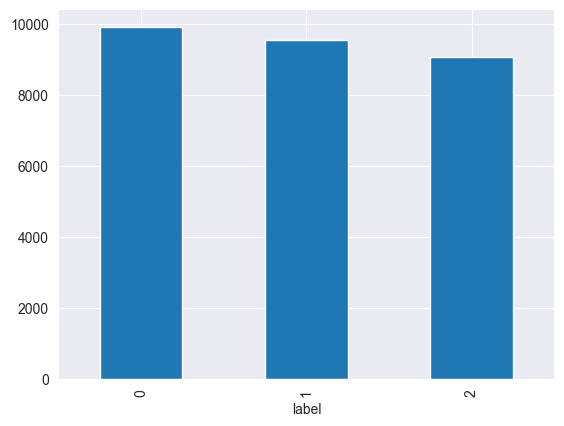

In [145]:
# plot the label distribution between 0, 1 and 2 value counts
df["label"].value_counts().plot(kind='bar')


In [146]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'label'],
      dtype='object')

In [147]:
# check for missing values
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

In [148]:
# drop the missing values
df = df.dropna()
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

# Preprocessing

In [149]:
# Split the dataset into features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the NumPy arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Create a DataLoader
trainloader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
testloader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)


In [150]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # with 3 hidden layers with 128 neurons each and ReLU activation and a final output layer with 3 neurons and softmax activation
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

In [151]:
# Initialize the model
model = Net()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [152]:
# Train the model
n_epochs = 15
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    model.train()
    for inputs, targets in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_losses[it] = loss.item()

    model.eval()
    for inputs, targets in testloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_losses[it] = loss.item()

    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_losses[it]:.4f}, Test Loss: {test_losses[it]:.4f}')
    

Epoch 1/15, Train Loss: 0.0037, Test Loss: 0.0000
Epoch 2/15, Train Loss: 0.0010, Test Loss: 0.0003
Epoch 3/15, Train Loss: 0.0055, Test Loss: 0.0058
Epoch 4/15, Train Loss: 0.0006, Test Loss: 0.0061
Epoch 5/15, Train Loss: 0.0439, Test Loss: 0.0002
Epoch 6/15, Train Loss: 0.0541, Test Loss: 0.0125
Epoch 7/15, Train Loss: 0.1899, Test Loss: 0.7545
Epoch 8/15, Train Loss: 0.0089, Test Loss: 0.0156
Epoch 9/15, Train Loss: 0.0082, Test Loss: 0.0207
Epoch 10/15, Train Loss: 0.0384, Test Loss: 0.0327
Epoch 11/15, Train Loss: 0.0011, Test Loss: 0.0026
Epoch 12/15, Train Loss: 0.0016, Test Loss: 0.0025
Epoch 13/15, Train Loss: 0.0014, Test Loss: 0.0021
Epoch 14/15, Train Loss: 0.0043, Test Loss: 0.0057
Epoch 15/15, Train Loss: 0.0020, Test Loss: 0.0027


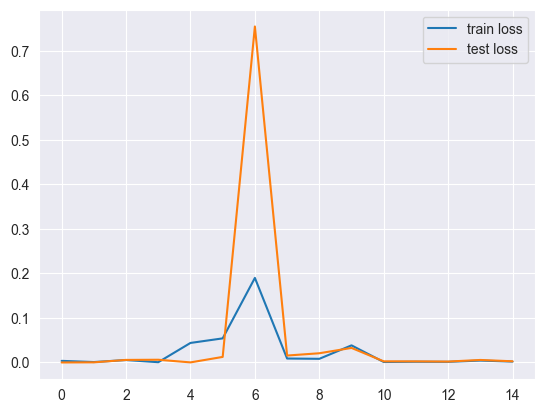

In [153]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()


In [154]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in trainloader:
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

train_acc
    

0.9985974754558204

Confusion matrix, without normalization
[[1974    4    0]
 [   8 1942    0]
 [   2    0 1774]]


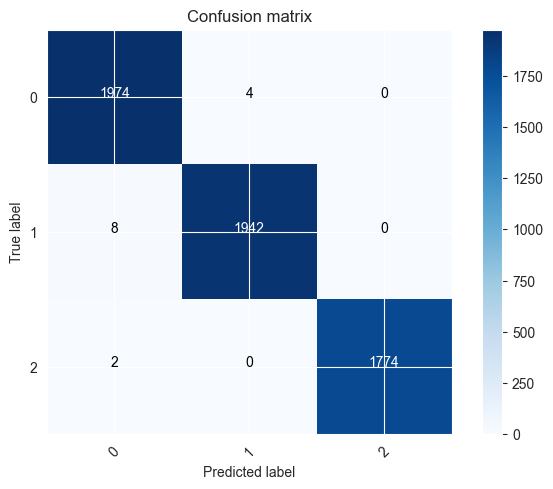

In [155]:
# confusion matrix plot
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Get all predictions in an array and plot the confusion matrix
model.eval()
predictions = []
targets = []
for inputs, targets_batch in testloader:
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    predictions.extend(preds)
    targets.extend(targets_batch)

predictions = torch.stack(predictions).cpu()
targets = torch.stack(targets).cpu()
cm = confusion_matrix(targets, predictions)
plot_confusion_matrix(cm, list(range(3)))

In [156]:
torch.save(model, '/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model.pth')

In [157]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'label'],
      dtype='object')

In [158]:
ts.summary(model, (16,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]           4,352
              ReLU-2                  [-1, 256]               0
            Linear-3                  [-1, 512]         131,584
              ReLU-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
              ReLU-6                  [-1, 256]               0
            Linear-7                  [-1, 256]          65,792
              ReLU-8                  [-1, 256]               0
            Linear-9                  [-1, 256]          65,792
             ReLU-10                  [-1, 256]               0
           Linear-11                  [-1, 256]          65,792
             ReLU-12                  [-1, 256]               0
           Linear-13                    [-1, 3]             771
Total params: 465,411
Trainable params: